<a href="https://colab.research.google.com/github/AdrianKSealy/ProjectPortfolio/blob/main/Youtube%20Advertising%20Project%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Youtube is the biggest online video sharing and social media platform in the world. Which makes it a lucrative platform option relating to advertising. Useful ways to promote your business would be placing a video ad through Youtube’s advertising program or using content creators on the platform. Youtube’s algorithm can help with choosing where to place your video ads. Therefore, when selecting content creators a business would want to make sure the creator has an abundance of views. I will investigate how a business should proceed selecting content creators to promote their business. 

Data [link text](https://www.kaggle.com/datasets/advaypatil/youtube-statistics/download?datasetVersionNumber=1)

In [ ]:
# data and visulations imports
import pandas as pd
import numpy as np
import seaborn as sns
import math
import scipy as sp
import matplotlib.pyplot as plt
import csv
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# video stats data

video_stats_df = pd.read_csv('/content/gdrive/My Drive/Colab DFs/videos-stats.csv')
video_stats_df


,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,8/23/2022,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,8/24/2022,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,8/23/2022,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,8/23/2022,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,8/8/2022,tech,96513.0,5155.0,1855644.0
...,...,...,...,...,...,...,...,...
1876,1876,Should You Learn Machine Learning?,AO6urf07KjE,6/14/2021,machine learning,10259.0,416.0,386360.0
1877,1877,Todos podemos aprender Machine learning,7ClLKBUvmRk,10/8/2017,machine learning,2981.0,72.0,431421.0
1878,1878,"Andrew Ng: Deep Learning, Education, and Real-...",0jspaMLxBig,2/20/2020,machine learning,5198.0,443.0,226152.0
1879,1879,What is Machine Learning?,f_uwKZIAeM0,1/11/2017,machine learning,NaN,NaN,NaN


In [ ]:
video_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1881 non-null   int64  
 1   Title         1881 non-null   object 
 2   Video ID      1881 non-null   object 
 3   Published At  1881 non-null   object 
 4   Keyword       1881 non-null   object 
 5   Likes         1879 non-null   float64
 6   Comments      1879 non-null   float64
 7   Views         1879 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 117.7+ KB


There seems to be some null values in the float columns, I'll proceed to clean the data.

Also, the keywords seem to have duplicates but they are based on keywords used. One video can have more than one keyword and get different views, comments, and likes. Based on that I will created two different dataframes to do my analysis.

In [ ]:
#There seems to be 2 records that are null for likes, comments, views

video_stats_df = video_stats_df.dropna()

In [ ]:
# Looking for distinct objects in Video ID column
video_stats_df['Video ID'].value_counts().head(13)

#NAME?         30
mqc6QqoGNWI     2
2FYvHn12pOQ     2
5q87K1WaoFI     2
RFMi3v0TXP8     2
WBK2_lD7KGA     2
R-R0KrXvWbc     2
ZgeorpjGJC0     2
LeC5yJq4tsI     2
kkOweffr3II     2
7eh4d6sabA0     2
4mgePWWCAmA     2
96mrgd8-3yE     2
Name: Video ID, dtype: int64

In [ ]:
# There are duplicates based on what keyword is used so I'll make another df without them
video_stats_df_WO = video_stats_df.drop_duplicates(subset='Video ID', keep='first', inplace=False)

In [ ]:
video_stats_df.drop(labels='Unnamed: 0', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Keywords help YouTube understand the type of content you produce and who your target audience is. Lets look at the the relationship keywords have on views.

In [ ]:
#Uses of keywords in the data
video_stats_df['Keyword'].value_counts()

minecraft           50
asmr                50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
reaction            50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
trolling            50
xbox                49
sat                 49
sports              49
tech                48
computer science    48
nintendo            48
food                48
machine learning    48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: Keyword, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

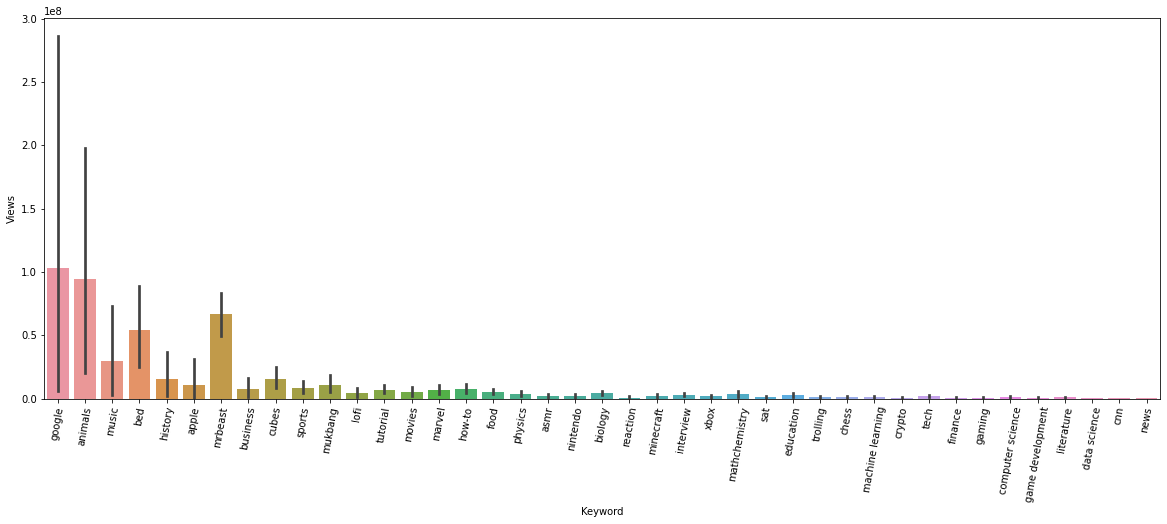

In [ ]:
#Barplot of keyword views
plt.figure(figsize=(20,7))
sns.barplot(x='Keyword',y='Views',data=video_stats_df.sort_values(by='Views',ascending=False))
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

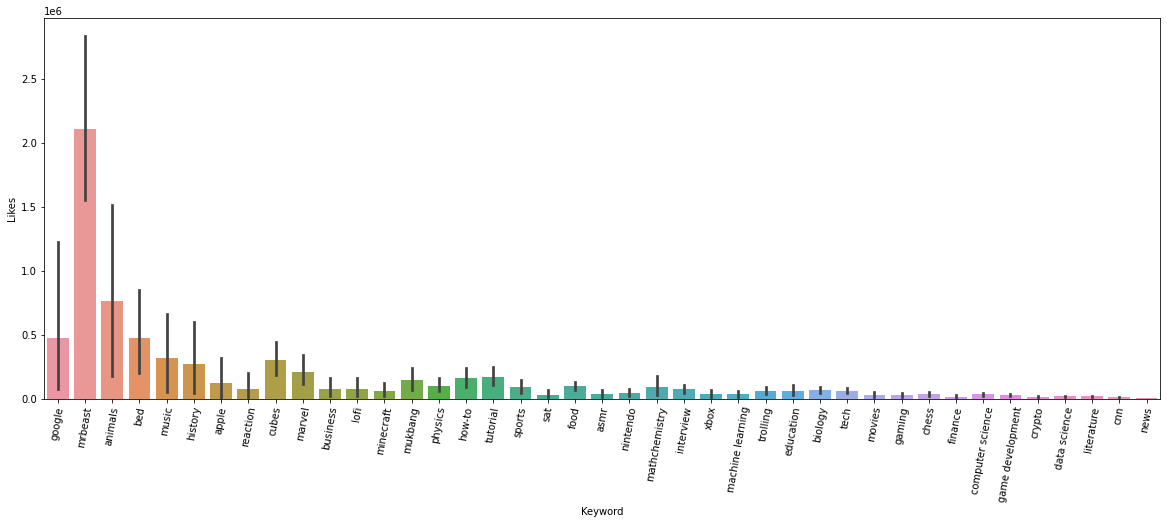

In [ ]:
#Barplot of keyword likes
plt.figure(figsize=(20,7))
sns.barplot(x='Keyword', y='Likes',data=video_stats_df.sort_values(by='Likes', ascending=False)) 
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

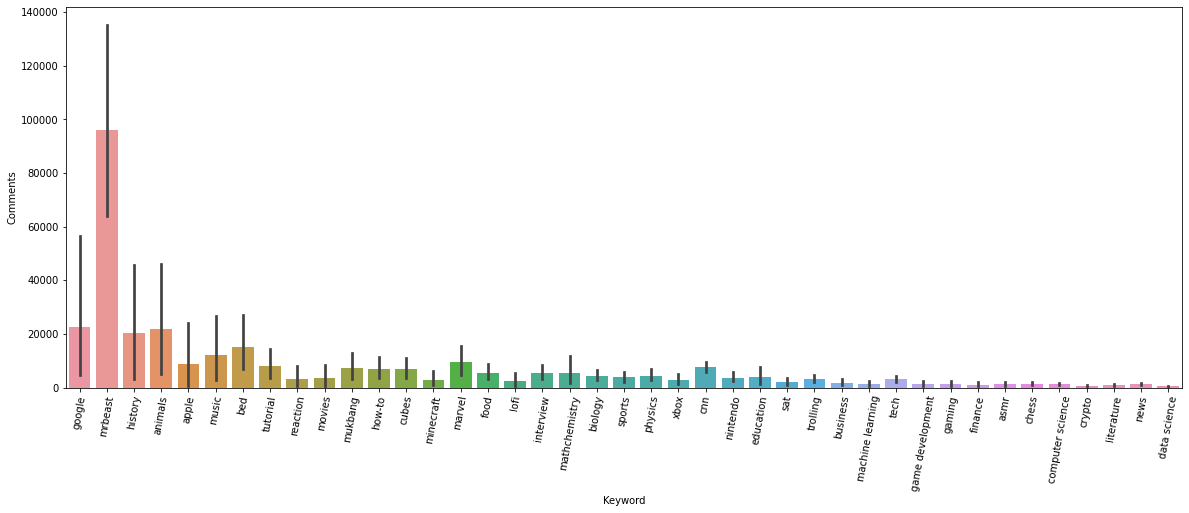

In [ ]:
#Barplot of keywork comments
plt.figure(figsize=(20,7))
sns.barplot(x='Keyword', y='Comments',data=video_stats_df.sort_values(by='Comments', ascending=False))
plt.xticks(rotation=80)

Based on the data keyword mrbeast has receieved more likes and comments than the other keywords. google has received the most views. Now I'll run a t-test with keywords google and mrbeast to see if there is a significant difference between google and mrbeast views.  

**Hypothesis 1**

H1:The mean of google's views will be <> then the mean of mrbeast views

Ha:The mean of google's views will be = to the mean of mrbeast views

In [ ]:
#Separating keywords mrbeast and google from the df
mrbeast_stats = video_stats_df.loc[(video_stats_df['Keyword']== 'mrbeast')]
mrbeast_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1279 to 1328
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         50 non-null     object 
 1   Video ID      50 non-null     object 
 2   Published At  50 non-null     object 
 3   Keyword       50 non-null     object 
 4   Likes         50 non-null     float64
 5   Comments      50 non-null     float64
 6   Views         50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.1+ KB


In [ ]:
google_stats = video_stats_df.loc[(video_stats_df['Keyword']== 'google')]
google_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 553 to 597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         45 non-null     object 
 1   Video ID      45 non-null     object 
 2   Published At  45 non-null     object 
 3   Keyword       45 non-null     object 
 4   Likes         45 non-null     float64
 5   Comments      45 non-null     float64
 6   Views         45 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.8+ KB


In [ ]:
sp.stats.ttest_ind(google_stats['Views'],mrbeast_stats['Views'])

Ttest_indResult(statistic=0.4286697758876134, pvalue=0.669154831581722)

In [ ]:
#Function for the confidence intervals
def get_95_ci(array_1, array_2):
	sample_1_n = array_1.shape[0]
	sample_2_n = array_2.shape[0]
	sample_1_mean = array_1.mean()
	sample_2_mean = array_2.mean()
	sample_1_var = array_1.var()
	sample_2_var = array_2.var()
	mean_difference = sample_2_mean - sample_1_mean
	std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
	margin_of_error = 1.96 * std_err_difference
	ci_lower = mean_difference - margin_of_error
	ci_upper = mean_difference + margin_of_error
	return('The difference in means at 95% confidence intervall(two-tail) is between {} and {}').format(ci_lower,ci_upper)



In [ ]:
get_95_ci(google_stats['Views'], mrbeast_stats['Views'])

'The difference in means at 95% confidence intervall(two-tail) is between -212911169.8689884 and 139709236.49565506'

The p-value of 0.67 is > than the alpha of 0.05, therefore we can not reject the null hypothesis. There is a 95% confidence that the difference in means is between -200M and 139M(-212,911,169.9 and 139,709,236.5)



**Hypothesis 2**

Hypothsis 2: Is there a strong correlation with views between likes and comments

In [ ]:
# Correlations of the data with views
video_stats_df_WO.corr()

,Unnamed: 0,Likes,Comments,Views
Unnamed: 0,1.000000,0.021967,0.027461,-0.011950
Likes,0.021967,1.000000,0.891903,0.756817
Comments,0.027461,0.891903,1.000000,0.660877
Views,-0.011950,0.756817,0.660877,1.000000


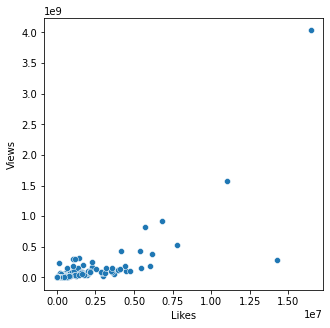

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Likes', y='Views', data=video_stats_df_WO)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 <a list of 10 Text major ticklabel objects>)

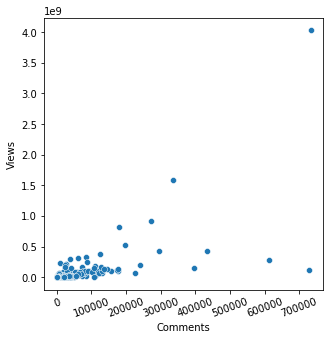

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Comments', y='Views', data=video_stats_df_WO)
plt.xticks(rotation=20)

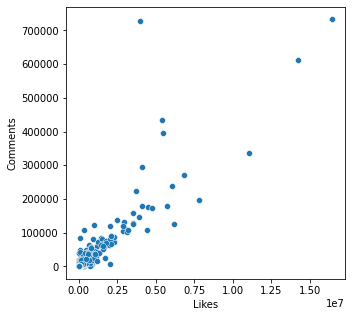

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Likes', y='Comments', data=video_stats_df_WO)

Based on the scatterplots there is a weak correlation between views and comments or views and likes. But what was interesting to find was a strong correlation betwen comments and likes.



**Recommendations**

1.  Keywords play a big role when it comes to views a video will get. Hence a 
business must make sure they are looking for keywords in videos that matches a viewer they want to advertise towards and that will get the most views.

2. Comments and likes have a weak correlation with views. But what's interesting is likes and comments have a strong correlation between each other. When selecting a content creator I would suggest to add another criteria which would be the amount of likes they get a video. Likes has a stronger correlation with views and the strongest correlation with comments. Meaning the more likes a video gets the more comments a video will have and views a video will have.